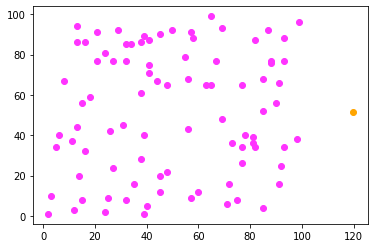

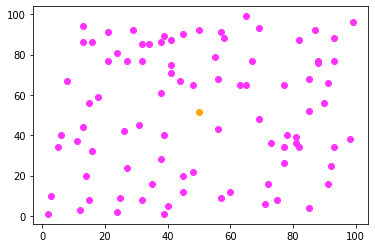

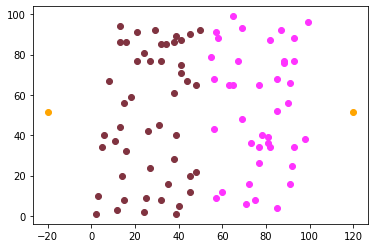

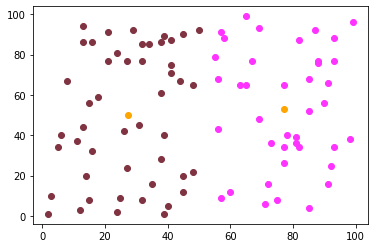

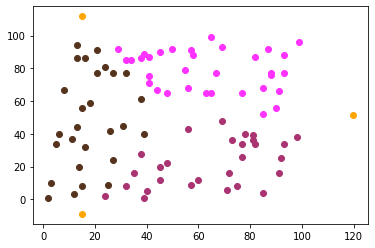

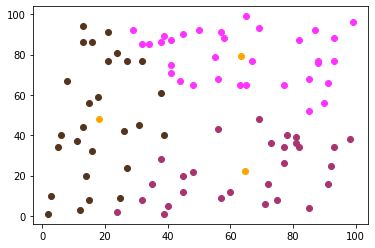

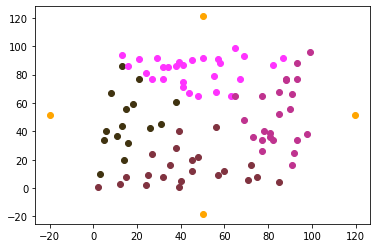

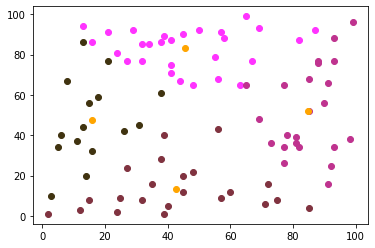

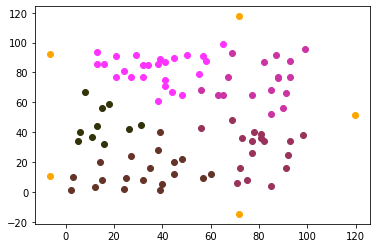

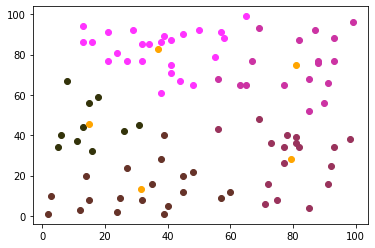

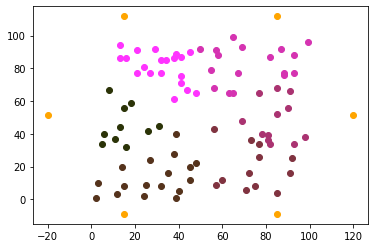

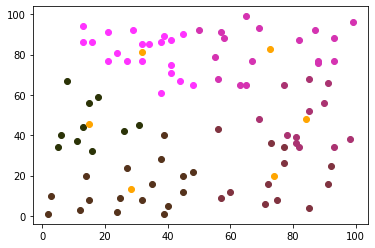

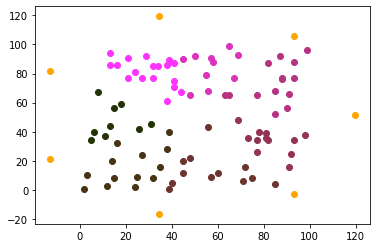

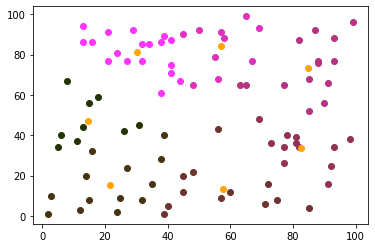

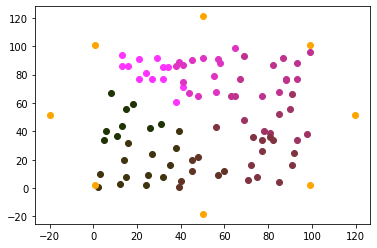

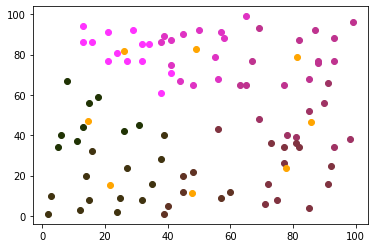

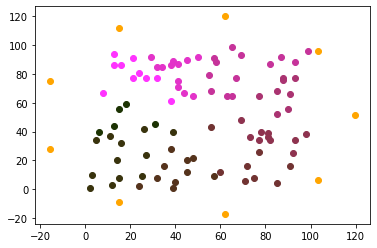

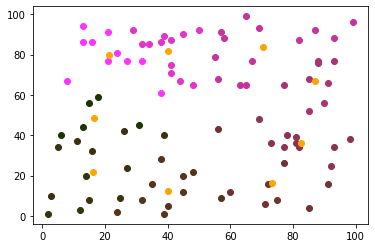

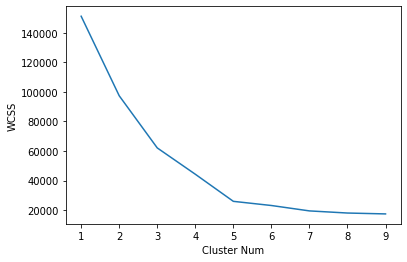

In [2]:
import numpy as np

import matplotlib.pyplot as plt


N = 88
x = np.random.randint(1, 100, N)
y = np.random.randint(1, 100, N)
x_c = np.mean(x)
y_c = np.mean(y)
wcss = []


def k_means(k):
    R = 0
    for i in range(0, N):
        if dist(x_c, y_c, x[i], y[i]) > R:
            R = dist(x_c, y_c, x[i], y[i])

    x_cc = [R * np.cos(2 * np.pi * i / k) + x_c for i in range(k)]
    y_cc = [R * np.sin(2 * np.pi * i / k) + y_c for i in range(k)]
    cluster = [0] * N
    clusterize(x_cc, y_cc, x, y, k, cluster)
    draw(x, y, cluster, x_cc, y_cc, k)

    while not check(x, y, x_cc, y_cc, cluster, k):

        check(x, y, x_cc, y_cc, cluster, k)


def mean_clusters(x, y, clusters, k, x_cc, y_cc):
    for i in range(0, k):
        z_x, z_y = [], []
        for j in range(0, len(clusters)):
            if clusters[j] == i:
                z_x.append(x[j])
                z_y.append(y[j])

        x_cc[i] = np.mean(z_x)
        y_cc[i] = np.mean(z_y)


def draw(x, y, clusters, x_cc, y_cc, k):
    cluster_length = len(clusters)
    for i in range(0, cluster_length):
        clr = (clusters[i] + 1) / k
        plt.scatter(x[i], y[i], color=(clr, 0.2, clr ** 2))

    plt.scatter(x_cc, y_cc, color='orange')
    plt.show()


def check(x, y, x_cc, y_cc, clust, k):
    x_old, y_old = x_cc, y_cc
    clusterize(x_cc, y_cc, x, y, k, clust)
    mean_clusters(x, y, clust, k, x_cc, y_cc)
    draw(x, y, clust, x_cc, y_cc, k)

    if x_old == x_cc and y_old == y_cc:
        wss = 0
        for i in range(0, k):
            clusterSum = 0
            for j in range(0, len(clust)):
                if clust[j] == i:
                    clusterSum += dist(x[j], y[j], x_cc[i], y_cc[i]) ** 2

            wss += clusterSum

        wcss.append(wss)

        return True
    else:
        return False


def clusterize(x_cc, y_cc, x, y, k, cluster):
    for i in range(0, N):
        r = dist(x_cc[0], y_cc[0], x[i], y[i])
        numb = 0
        for j in range(0, k):
            if r < dist(x_cc[j], y_cc[j], x[i], y[i]):
                numb = j
                r = dist(x_cc[j], y_cc[j], x[i], y[i])

            if j == k - 1:
                cluster[i] = numb


def dist(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)


for i in range(1, 10):
    k_means(i)


plt.plot(range(1, 10), wcss)
plt.xlabel('Cluster Num')
plt.ylabel('WCSS')
plt.show()